### 使用梯度上升法求解主成分

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2)) # 用元组创建特殊矩阵，100个样本，2个特征
np.random.seed = 666
X[:, 0] = np.random.uniform(0., 100., size=100) # 平均分布，在一个范围内
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100) # 噪声一般用正太分布即可
# 用线性关系模拟二维特征空间数据分布， 有一个基本的基本线性关系，降维的效果会比较明显

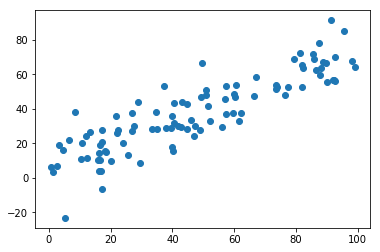

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean
首先要进行demean的操作  
相当于数据归一化了，只是没有让数据的方差归一化为1  

In [4]:
def demean(X): # 求均值归零后的矩阵
    return X - np.mean(X, axis=0) # 对行方向上求均值，也就是得到每一列的均值，也就是每个特征方向的样本均值
# 每个样本减去对应特征的均值
# axis=0得到一个行向量

In [5]:
np.random.uniform(0., 10., size=15).reshape(3, 5)
XX = np.random.uniform(0, 10, size=6).reshape(2, 3)
XX

array([[ 9.19126494,  0.42316284,  3.13970455],
       [ 6.1517673 ,  5.32931857,  3.24501795]])

In [6]:
np.mean(XX, axis=0) # 得到的是行向量，然后会向下广播扩展成矩阵

array([ 7.67151612,  2.8762407 ,  3.19236125])

In [7]:
XX - np.mean(XX, axis=0) # 纵轴方向广播扩展

array([[ 1.51974882, -2.45307787, -0.0526567 ],
       [-1.51974882,  2.45307787,  0.0526567 ]])

In [8]:
np.mean(XX, axis=1).reshape(2, 1)

array([[ 4.25137744],
       [ 4.90870127]])

In [9]:
XX - np.mean(XX, axis=1).reshape(2, 1) # 作用于每一行/每一列，广播形式扩展开来

array([[ 4.9398875 , -3.82821461, -1.11167289],
       [ 1.24306602,  0.4206173 , -1.66368332]])

In [10]:
X_demean = demean(X)

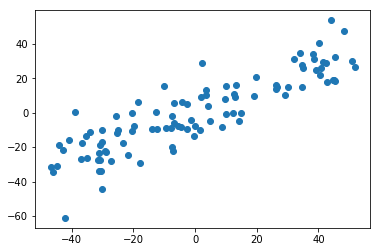

In [11]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [12]:
np.mean(X_demean[:, 0]) # 并没有改变数据的维度

4.6895820560166614e-15

In [13]:
np.mean(X_demean[:, 1])

1.3073986337985844e-14

### 梯度上升法

In [14]:
def f(w, X): # 我们推导的时候w默认是单位向量
    return np.sum((X.dot(w)**2)) / len(X)

In [15]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2.  / len(X)

In [16]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] -= epsilon
        w_2 = w.copy()
        w_2[i] += epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [17]:
def direction(w): # 如果大于1，则搜索过程会不顺畅，会使eta变小，也相当于一种归一化吧
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w) # 接受的开始单位化一下
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w # 记录下上次的w是多少，w只代表方向，所以是单位向量
        w = w + eta * gradient # 使用梯度上升法记录新的w是多少
        w = direction(w) # 下面处理的时候单位化一下
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
    return w

w初始值不能为0  
w为0没有任何方向  
w为0本身就是最小值的极值点，梯度值始终为0  

In [18]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量
initial_w

array([ 0.89283774,  0.6378576 ])

In [19]:
eta = 0.001

In [20]:
# 注意3：不能使用StandardScaler标准化数据

In [21]:
# 方差不存在了，就求不到方差最大值了
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([ 0.80892546,  0.58791122])

In [23]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([ 0.80892465,  0.58791233])

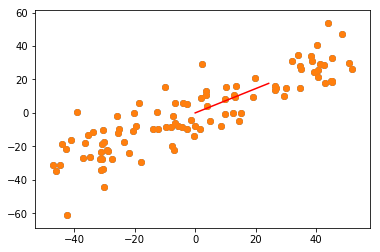

In [25]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r') # 1个主成分
plt.show()

### 不加噪声

In [27]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

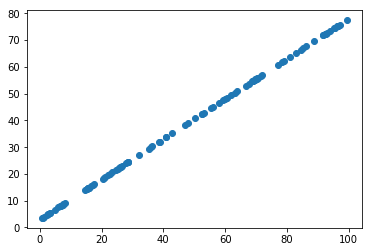

In [28]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [29]:
X2_demean = demean(X2)

In [30]:
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([ 0.80000022,  0.59999971])

In [31]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

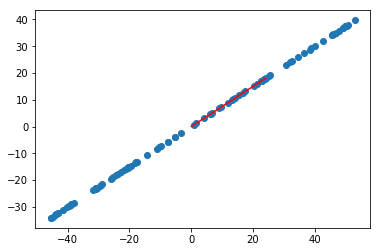

In [32]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

批量梯度上升法  
随机梯度上升法  
小批量梯度上升法  

求出第1、2、3主成分